In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [4]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [5]:
df.sample(5)

,gender,height
4767,Male,66.329057
4498,Male,67.381773
5711,Female,60.772054
8086,Female,67.778712
2841,Male,70.884666


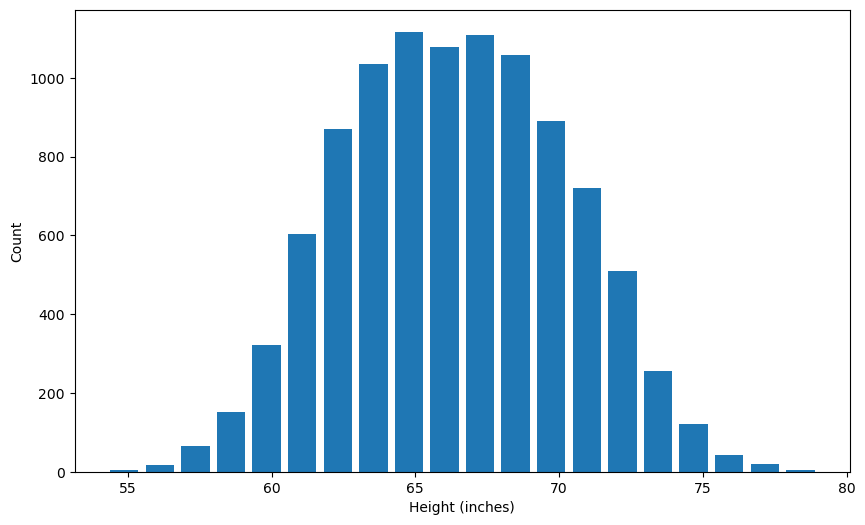

In [9]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [10]:
df.shape

(10000, 2)

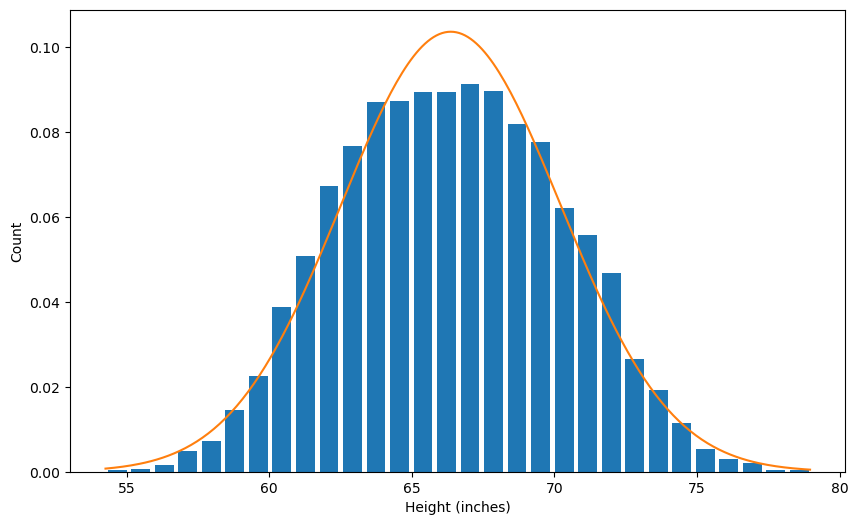

In [12]:
import numpy as np
from scipy.stats import norm

plt.hist(df.height, bins=30, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
# for histogram

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))
# for bell curve

In [13]:
df.height.mean()

66.367559754866

In [14]:
df.height.std()

3.847528120795573

In [19]:
df[(df.height >= (df.height.mean() - df.height.std())) & (df.height <= (df.height.mean() + df.height.std()))].shape

(6527, 2)

In [21]:
upper_limit = df.height.mean() + 3 * df.height.std()
lower_limit = df.height.mean() - 3 * df.height.std()

df[(df.height < lower_limit) | (df.height > upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [25]:
df_no_outlier_std_dev = df[(df.height >= lower_limit) & (df.height <= upper_limit)]
df_no_outlier_std_dev.shape

(9993, 2)

In [27]:
# Z score: its value denotes how much away is it from mean, for ex: 2.5 means 2.5 std away from mean which is ok, 
# if its more than 3 or less than -3, then clean the data

df['zscore'] = (df.height - df.height.mean())/df.height.std()
df.sample(10)

,gender,height,zscore
9720,Female,62.391383,-1.033437
7885,Female,60.042338,-1.643970
998,Male,72.231636,1.524115
4501,Male,70.204348,0.997209
8863,Female,65.146081,-0.317471
1640,Male,70.821431,1.157593
7961,Female,67.236780,0.225916
4041,Male,66.626519,0.067305
7440,Female,61.286205,-1.320680
6935,Female,66.166876,-0.052159


In [28]:
df[df.zscore > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [29]:
df[df.zscore < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027
